In [32]:
#エクセルファイルの変換を目指して
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import math
def Base_10_to_n(X, n):
    X_dumy = X
    out = ''
    while X_dumy>0:
        out = str(X_dumy%n)+out
        X_dumy = int(X_dumy/n)
    return out

def count(spam, var, leng):
    found = 0
    for i in range(len(spam) - leng +1):
        if spam[i:(i+leng)] == var:
            found += 1
    return found
def Base_n_to_10(X,n):
    out = 0
    for i in range(1,len(str(X))+1):
        out += int(X[-i])*(n**(i-1))
    return out#int out
def Base_n_to_m(X, n, m):
    return Base_n_to_10(Base_10_to_n(X, n), m)
    

In [116]:
#ファイルの読み込み
file_name1 = 'B39 restraint R2'
file_name2 = 'B39 restraint R3'
file1 = pd.ExcelFile(file_name1+'.xlsx')
file2 = pd.ExcelFile(file_name2+'.xlsx')
#time_file = open(file_name1 + '_' + file_name2 +'_time_data.csv', 'w')

time_leng = 10
pattern_leng = 3


sheet_df1 = file1.parse(file1.sheet_names, header=None)
sheet_df2 = file2.parse(file2.sheet_names, header=None)

cmap = plt.get_cmap("tab20")

sheet_names1 = file1.sheet_names
sheet_names2 = file2.sheet_names

max_psth1 = 0
max_psth2 = 0

sum_pattern1 = 0
sum_pattern2 = 0

In [117]:
#ファイル1のデータカウント
for i, name in enumerate(sheet_names1):
    sheet_df1[i] = file1.parse(name)
    end_number = (np.where(sheet_df1[i]['INFORMATION']=="CHANNEL")[0][1])
    #print(sheet_df1[i])
    sig1 = (sheet_df1[i]['Unnamed: 3'][24:end_number-5])
    #sig1 = sig1 - sig1.mean()
    leng = end_number - 5 -24 - time_leng
    psth = np.empty(leng, dtype=np.int)
    for k in range(leng) :
        psth[k] = sig1[k : k+time_leng].sum()
    #x = np.linspace(0, leng-1, leng)
    if (max(psth) > max_psth1) : 
        #pattern_count = np.append(pattern_count,  np.zeros((max(psth)+1) ** pattern_leng) - ((max_psth+1) ** pattern_leng) )
        max_psth1 = max(psth)
    psth_pattern = psth.astype('str')
    psth_pattern = ''.join(psth_pattern)
    psth_pattern = psth_pattern.strip('0')
    sum_pattern1 += (len(psth_pattern) - pattern_leng + 1)    

In [118]:
#ファイル2のデータカウント
for i, name in enumerate(sheet_names2):
    sheet_df2[i] = file2.parse(name)
    end_number = (np.where(sheet_df2[i]['INFORMATION']=="CHANNEL")[0][1])
    sig1 = (sheet_df2[i]['Unnamed: 3'][24:end_number-5])
    leng = end_number - 5 -24 - time_leng
    psth = np.empty(leng, dtype=np.int)
    for k in range(leng) :
        psth[k] = sig1[k : k+time_leng].sum()
    if (max(psth) > max_psth2) : 
        max_psth2 = max(psth)
    psth_pattern = psth.astype('str')
    psth_pattern = ''.join(psth_pattern)
    psth_pattern = psth_pattern.strip('0')
    sum_pattern2 += (len(psth_pattern) - pattern_leng + 1)  

In [119]:
#ファイル1のパターンカウント
psth_count1 = np.zeros(((max_psth1 + 1) ** pattern_leng), dtype=int)
        
for i, name in enumerate(sheet_names1):
    sheet_df1[i] = file1.parse(name)
    end_number = (np.where(sheet_df1[i]['INFORMATION']=="CHANNEL")[0][1])
    sig = (sheet_df1[i]['Unnamed: 3'][24:end_number-5])
    leng = end_number - 5 -24 - time_leng
    psth = np.empty(leng, dtype=np.int)
    for k in range(leng) :
        psth[k] = sig[k : k+time_leng].sum()
    psth_pattern = psth.astype('str')
    psth_pattern = ''.join(psth_pattern)
    psth_pattern = psth_pattern.strip('0')
    
    for i in range((max_psth1 + 1) ** pattern_leng) : 
        pattern = Base_10_to_n(i, (max_psth1+1))
        psth_count1[i] += count(psth_pattern, str(pattern).zfill(pattern_leng), pattern_leng)

print(psth_count1)
print(max_psth1)
print(sum_pattern1)

[30106   577     0     0     0   592     0     0     0     0     0     0
     0     0     0     0   577    16     0     0   593  5489   135     0
     0    26   113     0     0     0     0     0     0     0     0     0
     0   135     4     0     0   113   211     3     0     0     2     1
     0     0     0     0     0     0     0     0     0     0     3     0
     0     0     1     0]
3
38697


In [120]:
#ファイル2のパターンカウント
psth_count2 = np.zeros(((max_psth2 + 1) ** pattern_leng), dtype=int)
        
for i, name in enumerate(sheet_names2):
    sheet_df2[i] = file2.parse(name)
    end_number = (np.where(sheet_df2[i]['INFORMATION']=="CHANNEL")[0][1])
    sig = (sheet_df2[i]['Unnamed: 3'][24:end_number-5])
    leng = end_number - 5 -24 - time_leng
    psth = np.empty(leng, dtype=np.int)
    for k in range(leng) :
        psth[k] = sig[k : k+time_leng].sum()
    psth_pattern = psth.astype('str')
    psth_pattern = ''.join(psth_pattern)
    psth_pattern = psth_pattern.strip('0')
    
    for i in range((max_psth2 + 1) ** pattern_leng) : 
        pattern = Base_10_to_n(i, (max_psth2+1))
        psth_count2[i] += count(psth_pattern, str(pattern).zfill(pattern_leng), pattern_leng)

print(psth_count2)
print(max_psth2)
print(sum_pattern2)

[25014   944     0     0     0   983     0     0     0     0     0     0
     0     0     0     0   944    40     0     0   983  9168   340     0
     0    71   284     0     0     0     0     0     0     0     0     0
     0   340    15     0     0   284   508     4     0     0     2     2
     0     0     0     0     0     0     0     0     0     0     4     0
     0     0     2     0]
3
39932


In [121]:
#情報量の計算準備
if(max_psth1 >= max_psth2) : 
    max_psth = max_psth1
    min_psth = max_psth2
else : 
    max_psth = max_psth2
    min_psth = max_psth1

sum_pattern = sum_pattern1 + sum_pattern2
psth_count = psth_count1 + psth_count2
pattern_information = np.zeros(((max_psth + 1) ** pattern_leng))
print(max_psth)
print(sum_pattern)
print(psth_count)

3
78629
[55120  1521     0     0     0  1575     0     0     0     0     0     0
     0     0     0     0  1521    56     0     0  1576 14657   475     0
     0    97   397     0     0     0     0     0     0     0     0     0
     0   475    19     0     0   397   719     7     0     0     4     3
     0     0     0     0     0     0     0     0     0     0     7     0
     0     0     3     0]


In [122]:
#情報量の計算
pattern_information = np.zeros(((min_psth + 1) ** pattern_leng))
x = np.zeros((max_psth + 1) ** pattern_leng, dtype=object)
for i in range((min_psth + 1) ** pattern_leng) :
    p1 = psth_count1[Base_n_to_m(i, max_psth1, min_psth)] / sum_pattern1
    p2 = psth_count2[Base_n_to_m(i, max_psth2, min_psth)] / sum_pattern2
    x[i]  = str(Base_10_to_n(i, (min_psth + 1))).zfill(pattern_leng)
    if (p1 != 0) and (p2 != 0) : 
        pattern_information[i] = p1 * math.log2(p1/p2)
        #print(p1 * math.log2(p1/p2))
    else :
        pattern_information[i] = 0
    # if (p2 != 0) :
print(pattern_leng)
print(pattern_information)
print(sum(pattern_information))

3
[ 2.43230889e-01 -9.91401520e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.04988039e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -9.91401520e-03 -5.27836055e-04  0.00000000e+00  0.00000000e+00
 -1.04792251e-02 -9.85458408e-02 -4.49076114e-03  0.00000000e+00
  0.00000000e+00 -9.43318052e-04 -3.75015206e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.49076114e-03 -1.92424941e-04  0.00000000e+00
  0.00000000e+00 -3.75015206e-03 -6.66452850e-03 -2.86622136e-05
  0.00000000e+00  0.00000000e+00  2.34248682e-06 -2.46705531e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.86622136e-05  0.00000000e+00
  0.00000000e+00  0.000

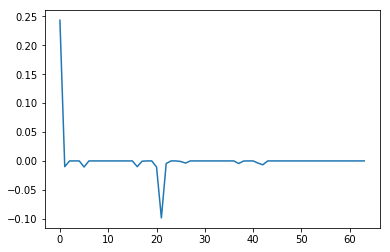

['000' '001' '002' '003' '010' '011' '012' '013' '020' '021' '022' '023'
 '030' '031' '032' '033' '100' '101' '102' '103' '110' '111' '112' '113'
 '120' '121' '122' '123' '130' '131' '132' '133' '200' '201' '202' '203'
 '210' '211' '212' '213' '220' '221' '222' '223' '230' '231' '232' '233'
 '300' '301' '302' '303' '310' '311' '312' '313' '320' '321' '322' '323'
 '330' '331' '332' '333']


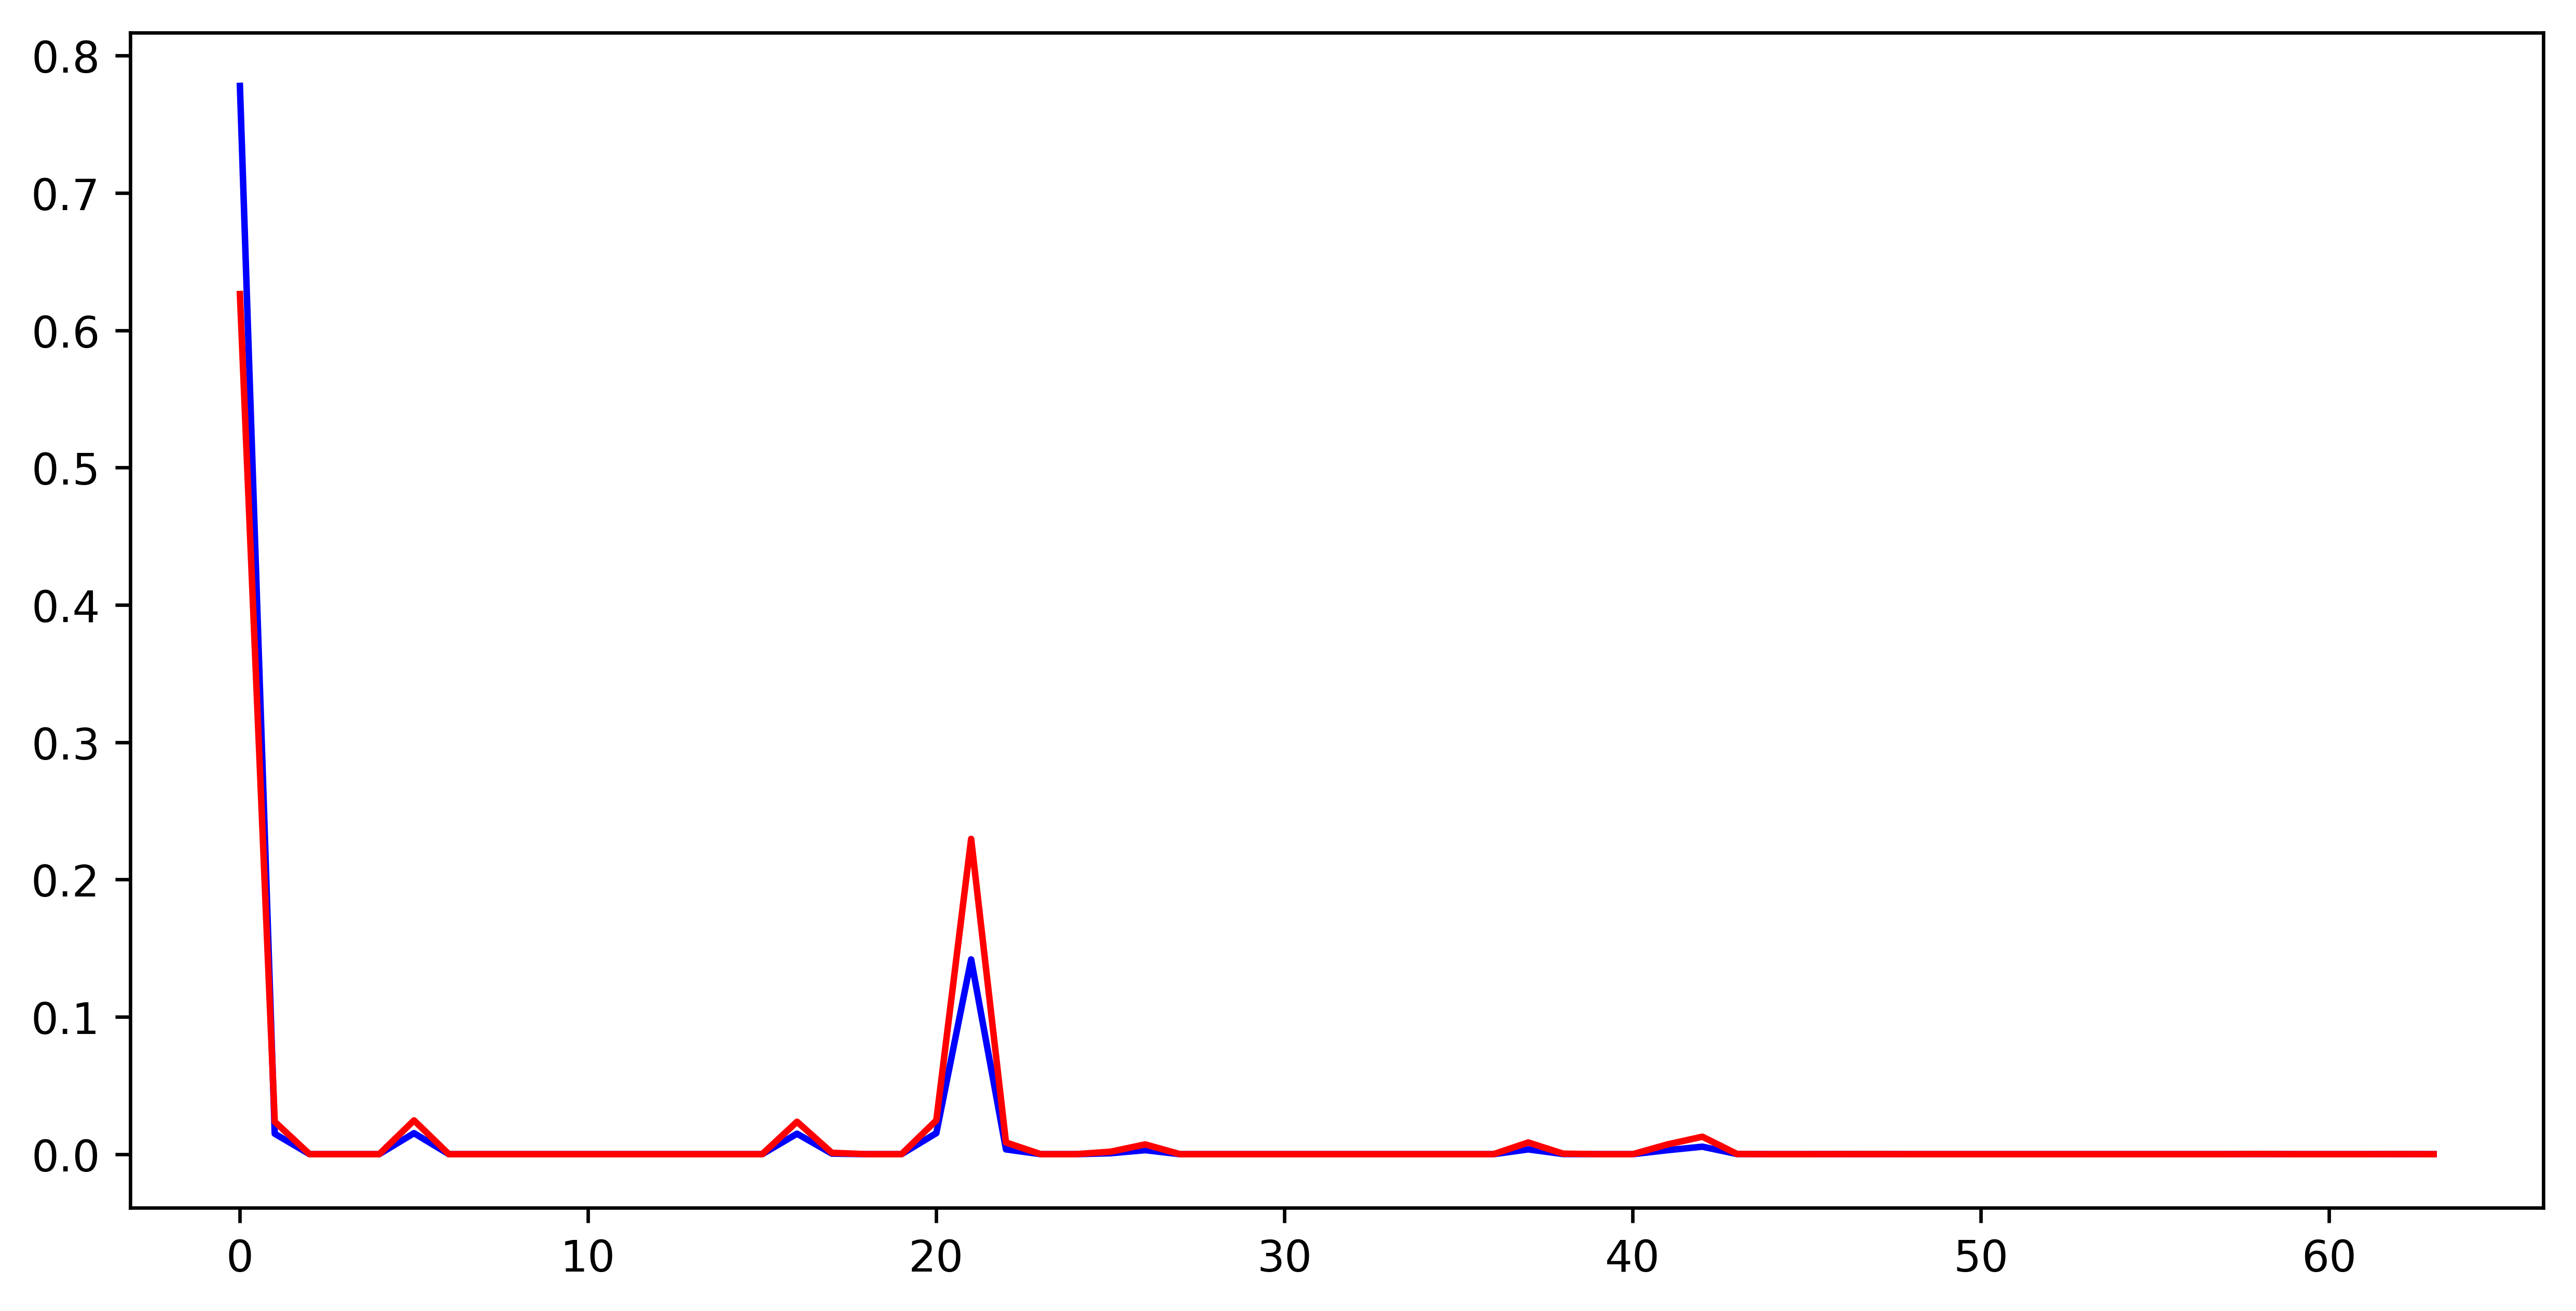

In [131]:
import matplotlib.ticker as ticker
plt.plot(pattern_information)
plt.show()
print(x)

fig = plt.figure(figsize=(10, 5), dpi=600)
ax = fig.gca()
plt.plot(psth_count1/sum_pattern1, color="blue")
plt.plot(psth_count2/sum_pattern2, color="red")
#plt.set_xticklabels(x)
#ax.set_xticklabels(x, rotation=90)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(x))
#ax.xticks(rotation=70)
plt.savefig("./info_graph/" + str(pattern_leng) + ".png")
plt.show()